### Voting Classifier

会有民主暴政的现象

比如唱歌比赛的投票，评委的评审分组权值大一些，普通人小一些

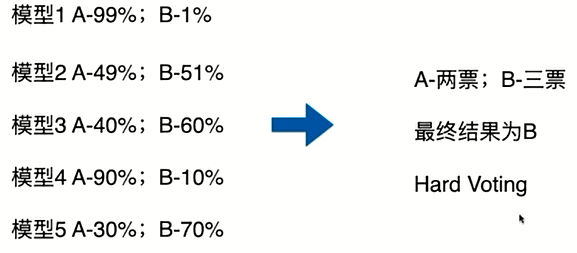

但是细心观察这些数据，感觉是不是还是有点不对呀

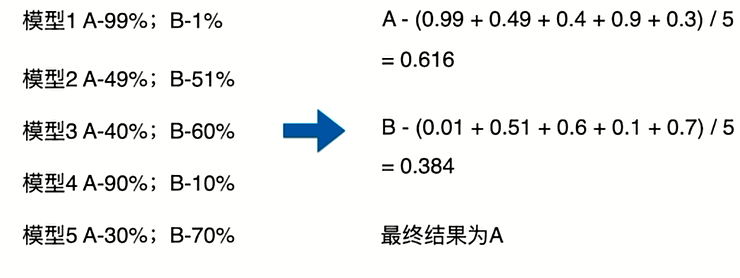

> 要求集合的每一个模型都能估计概率

### 逻辑回归  本身就是基于概率模型的
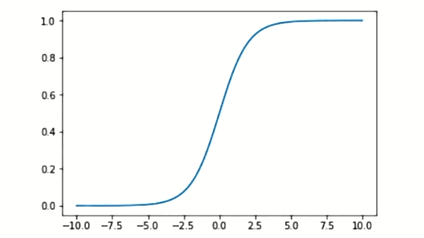

### KNN
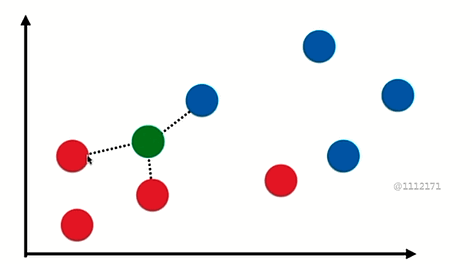

### 决策树
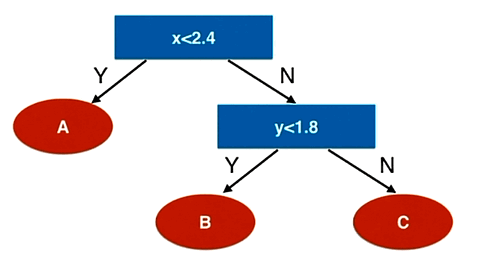

### SVC

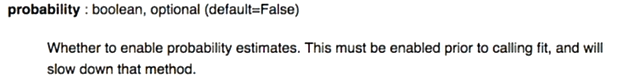

### Soft Voting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

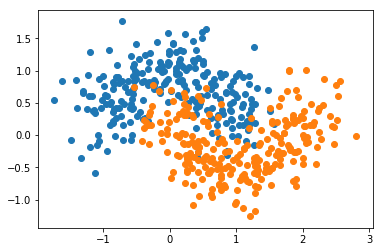

In [3]:
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

### Hard Voting Classifier

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [6]:
voting_clf = VotingClassifier(estimators=[
    ("log_clf", LogisticRegression()),
    ("svm_clf", SVC()),
    ("dt_clf", DecisionTreeClassifier(random_state=666))
], voting='hard')

In [7]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.896

### Soft Voting Classifier

In [8]:
voting_clf2 = VotingClassifier(estimators=[
    ("log_clf", LogisticRegression()),
    ("svm_clf", SVC(probability=True)),  # 为了支持概率计算
    ("dt_clf", DecisionTreeClassifier(random_state=666))
], voting='soft')

In [9]:
voting_clf2.fit(X_train, y_train)
voting_clf2.score(X_test, y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.888

soft的效果本来是要比hard的效果要好，大那是这里好像不是 那样的